In [67]:
import numpy as np
from joblib import Parallel, delayed
import pandas as pd
import matplotlib.pyplot as plt
norm='abs'
f_bin_number=1
Pmin=51
Pmax=200
bin_length=1/64
seg_length=16
fmin=0.0
fmax=32
mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20
J=mod_bin_number
spur_sub=True
coherence_corrector=False
output_file='/home/c2032014/cygx1_paper/q_u_nu_0_32_1bin.npy'

obs_dir='/home/c2032014/cygx1_paper/cyg_data_all'
obs_names=['01002901','01250101','03002201','03003101','03010001','03010101']

In [68]:
import sys
sys.path.append('/home/c2032014/cygx1_paper/')

import Q_U_NU_NEW_STACK_ABS as qun
import importlib

importlib.reload(qun)
norm='abs'
a=qun.run_q_u_nu_stack(obs_dir, obs_names, Pmin, Pmax, bin_length,
                                seg_length, fmin, fmax,f_bin_number,
                                mod_bin_number, mod_min,mod_max,spur_sub, coherence_corrector,norm,
                                output_file)

G_real_span [0.13026209 0.10170544 0.07721695 0.14752103 0.08219222 0.10981356
 0.1105351  0.12600643 0.11456848 0.10296333 0.10432069 0.11578998
 0.10805622 0.11458276 0.11231538 0.09048194 0.119718   0.10791576
 0.10855071 0.08970777]
G_im_span [ 0.00697994 -0.01727534  0.00534772 -0.017518    0.00366559  0.01011531
 -0.00125474 -0.01036878 -0.01585102 -0.00139937 -0.00048279  0.0136334
  0.0360043  -0.00844393  0.01491606 -0.00150274 -0.0241294   0.02878831
 -0.0231928  -0.02115815]
n_span (511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511)
m_span (3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 3391, 3391, 3393)
lc_1_sub_span (<stingray.lightcurve.Lightcurve object at 0x7f34da102860>, <stingray.lightcurve.Lightcurve object at 0x7f34da1023b0>, <stingray.lightcurve.Lightcurve object at 0x7f34c826feb0>, <stingray.lightcurve.Lightcurve object at 0x7f34da444070>, <stingray.lightcurve.L

F test: Full Model vs Null (1.690090013830061, 0.17365401688487003, 0.82634598311513, 1.3605560871456561)
F test: Null Hypothesis vs Null Hypothesis CPF (1.6850191288801828, 0.17481591121479179, 0.8251840887852082, 1.3568907977590343)
Figure(640x480)


In [69]:
import numpy as np
aspace = np.linspace(np.radians(-90), np.radians(90), mod_bin_number + 1)
mod_min_array = aspace[:-1]
mod_max_array = aspace[1:]
av_mod = (mod_min_array + mod_max_array) / 2
result_32_8= np.load(output_file, allow_pickle=True)

In [70]:
from collections import defaultdict

result = defaultdict(list)
for d in result_32_8:
    for key, value in d.items():
        result[key].append(value)

# If you want a regular dict, not defaultdict
result_32_8 = dict(result)


#print(result)

In [71]:
print(result_32_8)

{'f_av': [16.0], 'B_real_err': [0.04152708660492622], 'C_real_err': [0.041521854543447555], 'B_imag_err': [0.0348583461452381], 'C_imag_err': [0.034853951716136415], 'B_real': [-0.014491625484715609], 'C_real': [-0.04071518324983936], 'B_imag': [0.017246457969437246], 'C_imag': [-0.08737491682230303], 'A_null_real': [3.6197510290732646], 'B_null_real': [0.025475504647352123], 'C_null_real': [-0.02472379166130192], 'B_null_imag': [0], 'C_null_imag': [0], 'cs_G_real_stacked': [array([[ 9.37208416e+00,  8.20380224e+00,  6.36670329e+00, ...,
        -7.82592827e-02,  2.88245076e-02, -2.16419609e-02],
       [ 9.26972050e+00,  8.53119442e+00,  6.80580752e+00, ...,
        -4.12124877e-01, -2.46069603e-04, -4.69639769e-02],
       [ 9.56513461e+00,  8.49470430e+00,  6.53628995e+00, ...,
        -7.01319272e-02, -8.26146904e-03,  7.94308402e-02],
       ...,
       [ 9.49014115e+00,  8.43007894e+00,  6.62058043e+00, ...,
         5.71194445e-02,  2.43915860e-01,  1.08598936e-01],
       [ 9.2

In [72]:
fspace = np.linspace(fmin, fmax, f_bin_number + 1)
f_min_array, f_max_array = fspace[:-1], fspace[1:]
f_angle_list = list(zip(f_min_array, f_max_array))
av_f = (f_min_array + f_max_array) / 2
av_f_err = (f_max_array - f_min_array) / 2


b_null_null=[0]*len(av_f)
c_null_null=[0]*len(av_f)

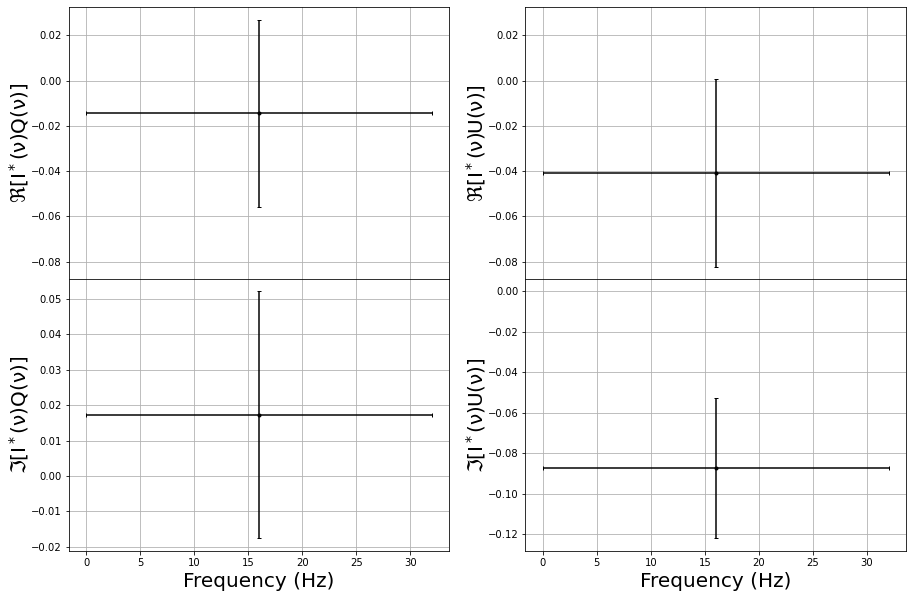

In [73]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15, 10))
#plt.plot(av_f, A_real, '.', label='A real')
# Create a GridSpec with 2 rows (we removed the top plot)
outer_gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])  # Middle and bottom plots get more space
outer_gs.update(hspace=0)

# B real and C real
middle_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[0])
ax_b_real = fig.add_subplot(middle_gs[0])
ax_c_real = fig.add_subplot(middle_gs[1], sharey=ax_b_real)
ax_b_real.set_ylabel(r'$\Re[\rm I^*(\nu) \rm Q(\nu)]$', size=20, labelpad=0)
ax_c_real.set_ylabel(r'$\Re[\rm I^*(\nu) \rm U(\nu)]$', size=20, labelpad=0)
#ax_c_real.set_title('C real')
ax_b_real.errorbar(av_f, result_32_8['B_real'], xerr=av_f_err, yerr=result_32_8['B_real_err'], ls='None', fmt='.', capsize=2,color='black')
ax_b_real.plot(av_f,result_32_8['B_null_real'],color='blue')
ax_c_real.errorbar(av_f, result_32_8['C_real'], xerr=av_f_err, yerr=result_32_8['C_real_err'], ls='None', fmt='.', capsize=2,color='black')
ax_c_real.plot(av_f,result_32_8['C_null_real'],color='blue')
ax_c_real.plot(av_f, c_null_null, color='forestgreen', linestyle='--', label='C null')
ax_b_real.plot(av_f, b_null_null, color='forestgreen', linestyle='--', label='B null')
ax_b_real.grid(True)
ax_c_real.grid(True)

# B imag and C imag (shares x-axis with the above)
bottom_gs = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=outer_gs[1])
ax_b_imag = fig.add_subplot(bottom_gs[0], sharex=ax_b_real)  # B imag shares x-axis with B real
ax_c_imag = fig.add_subplot(bottom_gs[1], sharex=ax_b_real)  # C imag shares x-axis with B real
ax_b_imag.set_ylabel(r'$\Im[\rm I^*(\nu) \rm Q(\nu)]$', size=20, labelpad=0)
ax_c_imag.set_ylabel(r'$\Im[\rm I^*(\nu) \rm U(\nu)]$', size=20, labelpad=0)
ax_b_imag.errorbar(av_f, result_32_8['B_imag'], xerr=av_f_err, yerr=result['B_imag_err'], ls='None', fmt='.', capsize=2,color='black')
ax_b_imag.plot(av_f,result_32_8['B_null_imag'],color='blue')
ax_c_imag.errorbar(av_f, result_32_8['C_imag'], xerr=av_f_err, yerr=result_32_8['C_imag_err'], ls='None', fmt='.', capsize=2,color='black')
ax_c_imag.plot(av_f,result_32_8['C_null_imag'],color='blue')
ax_c_imag.plot(av_f, c_null_null, color='forestgreen', linestyle='--', label='C null')
ax_b_imag.plot(av_f, b_null_null, color='forestgreen', linestyle='--', label='B null')
ax_c_imag.set_xlabel('Frequency (Hz)', fontsize=20)
ax_b_imag.set_xlabel('Frequency (Hz)', fontsize=20)
#plt.xscale('log')
#plt.yscale('log')
ax_b_imag.grid(True)
ax_c_imag.grid(True)



# Tight layout to avoid overlap of labels
#plt.tight_layout(rect=[0.06, 0.04, 1, 0.95])
plt.savefig('B_C_real_imag_wnull.pdf',dpi=1000)
plt.savefig('/home/c2032014/cygx1_paper/qu_nu_32.pdf',dpi=3000)
plt.show()


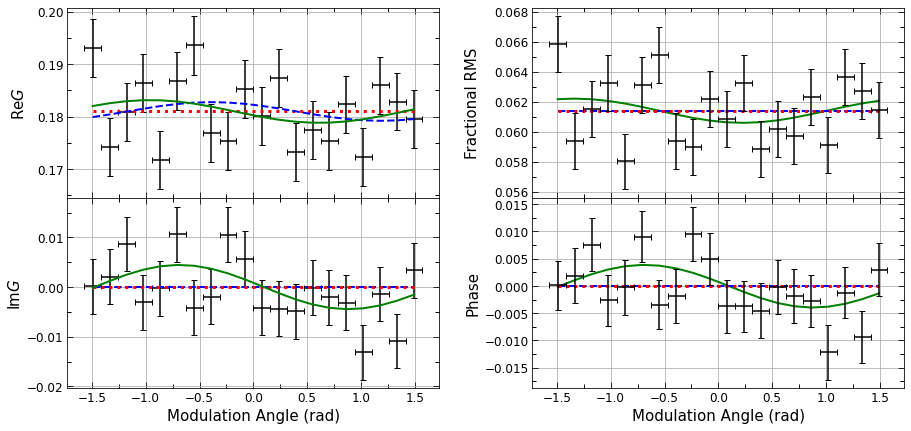

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    2, 2,
    figsize=(15, 7),
    sharex=True,
    gridspec_kw={'hspace': 0, 'wspace': 0.25}  # remove vertical gap
)

# Top-left: Re G
ax[0,0].errorbar(av_mod, result_32_8['G_real'][0], yerr=result_32_8['dG'], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
ax[0,0].plot(av_mod, result_32_8['G_null_cpf_real']*len(av_mod), linestyle='dotted', color='red',
             label='constant polarised flux model', linewidth=3)
ax[0,0].plot(av_mod, result_32_8['G_null_real'][0], linestyle='--', linewidth=2, color='blue',
             label='constant polarisation degree model')
ax[0,0].plot(av_mod, result_32_8['fit_model_real'][0], linestyle='solid', color='green',
             label='full fit model', linewidth=2)
ax[0,0].set_ylabel(r'$\mathrm{Re} G$', size=15, labelpad=10)
ax[1,0].set_xlabel('Modulation Angle (rad)', size=15)
ax[0,0].grid()

# Top-right: Fractional RMS (was bottom-left)
ax[0,1].plot(av_mod, result_32_8['frac_rms_model'][0], linestyle='solid', color='green',
                label='full fit model', linewidth=2)
ax[0,1].plot(av_mod, result_32_8['frac_rms_null'][0], linestyle='--', color='blue',
                label='constant polarisation degree model', linewidth=2)
ax[0,1].plot(av_mod, result_32_8['frac_rms_null_cpf']*len(av_mod), linestyle='dotted', color='red',
                label='constant polarised flux model', linewidth=3)
ax[0,1].errorbar(av_mod, result_32_8['frac_rms'][0], yerr=result_32_8['d_frac_rms'][0], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
ax[0,1].set_xlabel('Modulation Angle (radians)', size=15)
ax[0,1].set_ylabel('Fractional RMS', size=15,labelpad=15)
ax[0,1].grid()

# Bottom-left: Im G (was top-right)
ax[1,0].errorbar(av_mod, result_32_8['G_imag'][0], yerr=result_32_8['dG'][0], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
ax[1,0].plot(av_mod, result_32_8['G_null_imag'][0], linestyle='--', color='blue',
             label='constant polarisation degree model', linewidth=2)
ax[1,0].plot(av_mod, result_32_8['G_null_cpf_imag']*len(av_mod), linestyle='dotted', color='red',
             label='constant polarised flux model', linewidth=3)
ax[1,0].plot(av_mod, result_32_8['fit_model_imag'][0], linestyle='solid', color='green',
             label='full fit model', linewidth=2)
ax[1,0].set_ylabel(r'$\mathrm{Im} G$', size=15)
ax[1,0].grid()

# Bottom-right: Phase (unchanged)
ax[1,1].plot(av_mod, result_32_8['phase_lag_model'][0], linestyle='solid', color='green',
             label='full fit model', linewidth=2)
ax[1,1].plot(av_mod, result_32_8['phase_lag_null'][0],
                linestyle='--', color='blue',
                label='constant polarisation degree model', linewidth=2)
ax[1,1].plot(av_mod, result_32_8['phase_lag_null_cpf']*len(av_mod),
                linestyle='dotted', color='red',
                label='constant polarised flux model', linewidth=3)
ax[1,1].errorbar(av_mod, result_32_8['phase_lag'][0], yerr=result_32_8['d_phase_lag'][0], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
ax[1,1].set_xlabel('Modulation Angle (rad)', size=15)
ax[1,1].set_ylabel('Phase', size=15)
ax[1,1].grid()
from matplotlib.ticker import AutoMinorLocator
for axis in ax.flatten():  # flatten converts the 2x2 array to 1D
    axis.minorticks_on()
    axis.xaxis.set_minor_locator(AutoMinorLocator(2))  # 1 minor tick between majors
    axis.yaxis.set_minor_locator(AutoMinorLocator(2))
    axis.tick_params(axis='both', top=True, right=True, direction='in', which='major', labelsize=12,length=6)
    axis.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1,direction='in')  # shorter minor ticks


plt.tight_layout(h_pad=0)
#plt.savefig('03002201_L3_QPO.pdf', dpi=500)
plt.show()

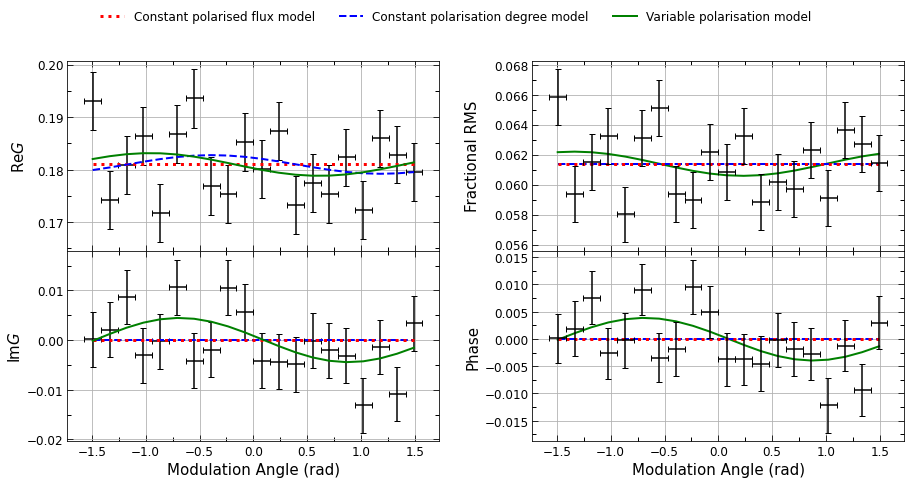

In [78]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(
    2, 2,
    figsize=(15, 7),
    sharex=True,
    gridspec_kw={'hspace': 0, 'wspace': 0.25}  # remove vertical gap
)

# --- Top-left: Re G ---
ax[0,0].errorbar(av_mod, result_32_8['G_real'][0], yerr=result_32_8['dG'], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
line1, = ax[0,0].plot(av_mod, result_32_8['G_null_cpf_real']*len(av_mod), linestyle='dotted', color='red',
             label='constant polarised flux model', linewidth=3)
line2, = ax[0,0].plot(av_mod, result_32_8['G_null_real'][0], linestyle='--', linewidth=2, color='blue',
             label='constant polarisation degree model')
line3, = ax[0,0].plot(av_mod, result_32_8['fit_model_real'][0], linestyle='solid', color='green',
             label='full fit model', linewidth=2)
ax[0,0].set_ylabel(r'$\mathrm{Re} G$', size=15, labelpad=10)
ax[1,0].set_xlabel('Modulation Angle (rad)', size=15)
ax[0,0].grid()

# --- Top-right: Fractional RMS ---
ax[0,1].plot(av_mod, result_32_8['frac_rms_model'][0], linestyle='solid', color='green',
                linewidth=2)
ax[0,1].plot(av_mod, result_32_8['frac_rms_null'][0], linestyle='--', color='blue',
                linewidth=2)
ax[0,1].plot(av_mod, result_32_8['frac_rms_null_cpf']*len(av_mod), linestyle='dotted', color='red',
                linewidth=3)
ax[0,1].errorbar(av_mod, result_32_8['frac_rms'][0], yerr=result_32_8['d_frac_rms'][0], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
ax[0,1].set_xlabel('Modulation Angle (radians)', size=15)
ax[0,1].set_ylabel('Fractional RMS', size=15,labelpad=15)
ax[0,1].grid()

# --- Bottom-left: Im G ---
ax[1,0].errorbar(av_mod, result_32_8['G_imag'][0], yerr=result_32_8['dG'][0], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
ax[1,0].plot(av_mod, result_32_8['G_null_imag'][0], linestyle='--', color='blue',
             linewidth=2)
ax[1,0].plot(av_mod, result_32_8['G_null_cpf_imag']*len(av_mod), linestyle='dotted', color='red',
             linewidth=3)
ax[1,0].plot(av_mod, result_32_8['fit_model_imag'][0], linestyle='solid', color='green',
             linewidth=2)
ax[1,0].set_ylabel(r'$\mathrm{Im} G$', size=15)
ax[1,0].grid()

# --- Bottom-right: Phase ---
ax[1,1].plot(av_mod, result_32_8['phase_lag_model'][0], linestyle='solid', color='green',
             linewidth=2)
ax[1,1].plot(av_mod, result_32_8['phase_lag_null'][0],
                linestyle='--', color='blue', linewidth=2)
ax[1,1].plot(av_mod, result_32_8['phase_lag_null_cpf']*len(av_mod),
                linestyle='dotted', color='red', linewidth=3)
ax[1,1].errorbar(av_mod, result_32_8['phase_lag'][0], yerr=result_32_8['d_phase_lag'][0], xerr=xerr,
                 linestyle='none', capsize=3, color='black')
ax[1,1].set_xlabel('Modulation Angle (rad)', size=15)
ax[1,1].set_ylabel('Phase', size=15)
ax[1,1].grid()

# --- Minor ticks and formatting ---
for axis in ax.flatten():  # flatten 2x2 array to 1D
    axis.minorticks_on()
    axis.xaxis.set_minor_locator(AutoMinorLocator(2))
    axis.yaxis.set_minor_locator(AutoMinorLocator(2))
    axis.tick_params(axis='both', top=True, right=True, direction='in', which='major', labelsize=12,length=6)
    axis.tick_params(axis='both', which='minor', top=True, right=True, length=4, width=1,direction='in')

plt.tight_layout(h_pad=0)

# --- Single figure legend ---
fig.legend([line1, line2, line3],
           ['Constant polarised flux model', 'Constant polarisation degree model', 'Variable polarisation model'],
           loc='upper center', ncol=3, fontsize=12, frameon=False)

plt.savefig('q_u_nu_1freq.pdf', dpi=500)
plt.show()
